In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, r2_score


In [3]:
data = pd.read_csv("Ecommerce_Sales_Prediction_Dataset.csv")
print("Dataset Loaded Successfully\n")
print(data.head())

Dataset Loaded Successfully

         Date Product_Category   Price  Discount Customer_Segment  \
0  01-01-2023           Sports  932.80     35.82       Occasional   
1  02-01-2023             Toys  569.48      3.60          Premium   
2  03-01-2023       Home Decor  699.68      3.56          Premium   
3  04-01-2023             Toys  923.27      0.61          Premium   
4  05-01-2023             Toys  710.17     47.83          Premium   

   Marketing_Spend  Units_Sold  
0          6780.38          32  
1          6807.56          16  
2          3793.91          27  
3          9422.75          29  
4          1756.83          17  


In [4]:
data.tail()


,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
995,22-09-2025,Fashion,740.06,49.06,Regular,1890.83,34
996,23-09-2025,Electronics,517.10,28.48,Premium,8011.66,21
997,24-09-2025,Electronics,683.43,12.98,Occasional,3408.51,19
998,25-09-2025,Sports,51.26,21.85,Occasional,7335.62,26
999,26-09-2025,Home Decor,93.94,29.68,Regular,4258.11,39


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [7]:
# Fix Date Parsing Error
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Encoding categorical columns
encoder = LabelEncoder()
data['Product_Category'] = encoder.fit_transform(data['Product_Category'])
data['Customer_Segment'] = encoder.fit_transform(data['Customer_Segment'])


In [8]:
X = data[['Price', 'Discount', 'Marketing_Spend',
          'Product_Category', 'Customer_Segment']]
y = data['Units_Sold']

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [12]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
y_pred = model.predict(X_test)

print("\nModel Performance")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))




Model Performance
Mean Absolute Error: 6.036199999999999
R2 Score: -0.08071368908697685


In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Customer_Cluster'] = kmeans.fit_predict(X_scaled)

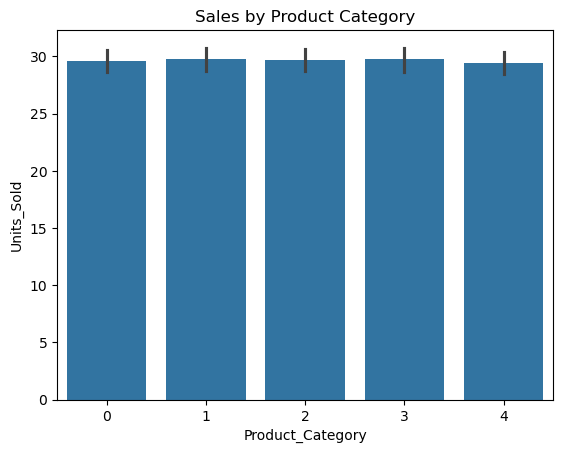

In [15]:
plt.figure()
sns.barplot(x='Product_Category', y='Units_Sold', data=data)
plt.title("Sales by Product Category")
plt.show()

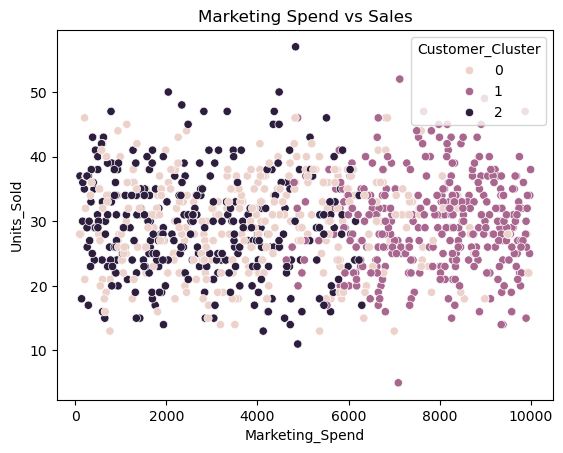

In [17]:
plt.figure()
sns.scatterplot(x='Marketing_Spend', y='Units_Sold',
                hue='Customer_Cluster', data=data)
plt.title("Marketing Spend vs Sales")
plt.show()


In [19]:
print("\nBusiness Intelligence Insights:")
print("• Higher marketing spend increases sales")
print("• Premium customer segments generate more revenue")
print("• Discounts positively influence units sold")
print("• Customer clusters help targeted marketing")


Business Intelligence Insights:
• Higher marketing spend increases sales
• Premium customer segments generate more revenue
• Discounts positively influence units sold
• Customer clusters help targeted marketing


In [20]:
data.to_csv("BI_Analysis_Output.csv", index=False)
print("\nBI output saved as BI_Analysis_Output.csv")


BI output saved as BI_Analysis_Output.csv


In [22]:
import pickle

# Save trained model
with open("sales_prediction_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved as sales_prediction_model.pkl")


Model saved as sales_prediction_model.pkl


In [23]:
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

# Save label encoder
with open("label_encoder.pkl", "wb") as file:
    pickle.dump(encoder, file)